# EDA Colleges.
analyse sur le ficheir "data/Second_deg_Colleges/fr-en-ips_colleges2016_2021.csv" 
- source 2016-2021=> https://www.data.gouv.fr/fr/datasets/r/b63bd365-c589-48e4-b7d8-9e4f5db133c5
- source 2022 + => https://www.data.gouv.fr/fr/datasets/r/28e511a7-af0d-48c7-a8bb-2f38ec003f49


In [2]:
import pandas as pd
import seaborn as sns
import os #import de l'Os
from dotenv import load_dotenv, find_dotenv

In [3]:
load_dotenv(find_dotenv("./.env"))
path2 = os.environ.get("IPSCOL") #Variable globale pour le fichier des IPS de collège.

In [4]:
df_2016 = pd.read_csv(os.path.join(path2, "fr-en-ips_colleges2016_2021.csv"), sep=";")
df_2022 = pd.read_csv(os.path.join(path2, "fr-en-ips-colleges-ap2022.csv"), sep=";")
df_2023 = pd.read_csv(os.path.join(path2, "fr-en-ips-colleges-ap2023.csv"), sep=";")

In [5]:
df_2022.describe()

,effectifs,ips,ecart_type_de_l_ips
count,6973.000000,6973.000000,6973.000000
mean,464.516994,104.125713,30.023017
std,209.807839,16.178249,4.636571
min,7.000000,59.000000,6.000000
25%,318.000000,93.700000,27.300000
50%,456.000000,103.300000,30.000000
75%,596.000000,113.800000,32.900000
max,1830.000000,163.300000,44.900000


In [6]:
df_2016.describe()

,ips,ecart_type_de_l_ips
count,41701.000000,20861.000000
mean,102.783777,33.001313
std,16.678568,4.240689
min,47.500000,0.000000
25%,92.600000,30.900000
50%,102.200000,33.300000
75%,112.800000,35.500000
max,157.600000,87.700000


In [7]:
# ajout de la colonne "ecart_type_de_l_ips" et effectifs
df_2016['ecart_type_de_l_ips']=""

df_2016.insert(loc=9,column='Effectifs', value='')

In [8]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41701 entries, 0 to 41700
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rentree_scolaire          41701 non-null  object 
 1   academie                  41701 non-null  object 
 2   code_du_departement       41701 non-null  object 
 3   departement               41701 non-null  object 
 4   uai                       41701 non-null  object 
 5   nom_de_l_etablissment     41701 non-null  object 
 6   code_insee_de_la_commune  41701 non-null  object 
 7   nom_de_la_commune         41701 non-null  object 
 8   secteur                   41701 non-null  object 
 9   Effectifs                 41701 non-null  object 
 10  ips                       41701 non-null  float64
 11  ecart_type_de_l_ips       41701 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.8+ MB


In [9]:
df_2023.info()
colNames= df_2023.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rentrée scolaire          6989 non-null   object 
 1   Académie                  6989 non-null   object 
 2   Code du département       6989 non-null   object 
 3   Département               6989 non-null   object 
 4   UAI                       6989 non-null   object 
 5   Nom de l'établissement    6989 non-null   object 
 6   Nom de la commune         6989 non-null   object 
 7   Code INSEE de la commune  6989 non-null   object 
 8   Secteur                   6989 non-null   object 
 9   Effectifs                 6989 non-null   int64  
 10  IPS                       6989 non-null   float64
 11  Ecart-type de l'IPS       6989 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 655.3+ KB


In [10]:
df_2022.columns = colNames
df_2016.columns = colNames

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


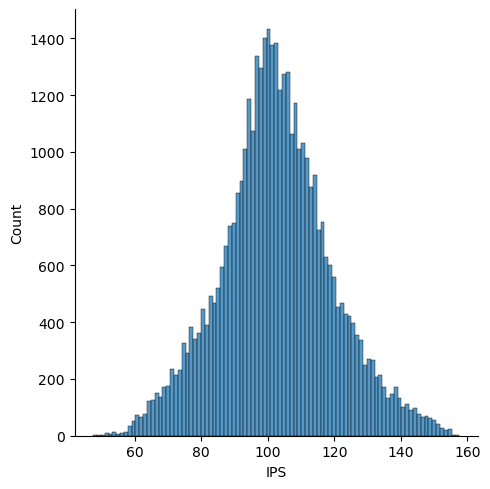

In [11]:
#visu IPS
fig2016 = sns.displot(df_2016, x='IPS')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


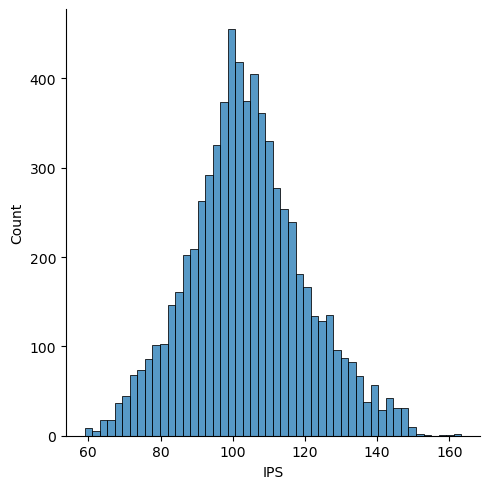

In [12]:
sns.displot(df_2022, x='IPS')

Normalisation des data 2016-2022 
- Normalisé_x = (x - min(x)) / (max(x) - min(x))

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


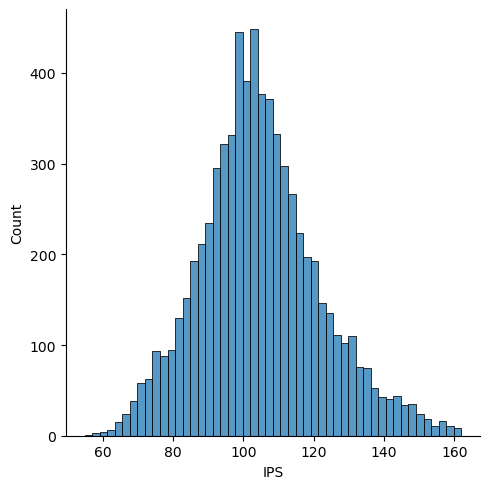

In [13]:
sns.displot(df_2023, x='IPS')

In [14]:
df_2016['IPS']= df_2016['IPS'] / df_2016['IPS'].abs().max()
df_2022['IPS']= df_2022['IPS'] / df_2022['IPS'].abs().max()
df_2023['IPS']= df_2023['IPS'] / df_2023['IPS'].abs().max()

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


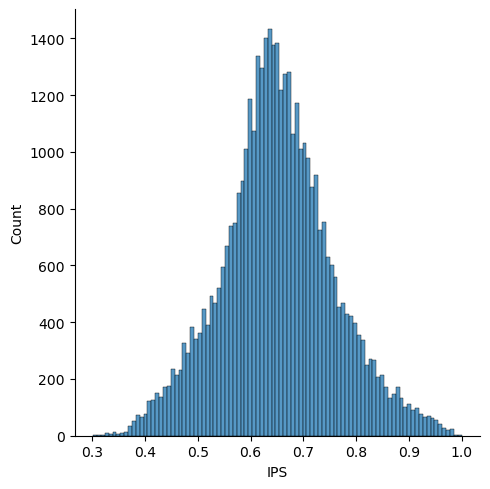

In [15]:
fig2016 = sns.displot(df_2016, x='IPS')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


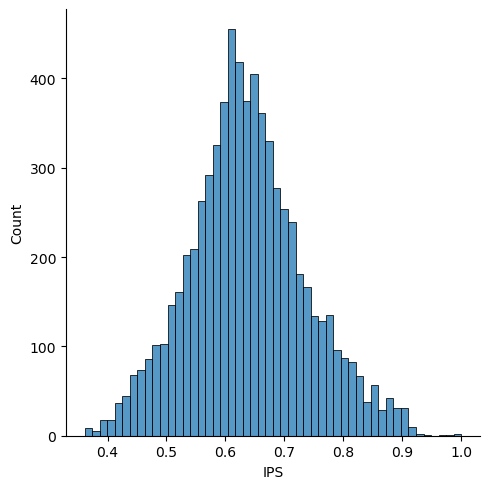

In [16]:
fig2022 = sns.displot(df_2022, x='IPS')

/home/thierry/anaconda3/envs/TrainingJedah/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


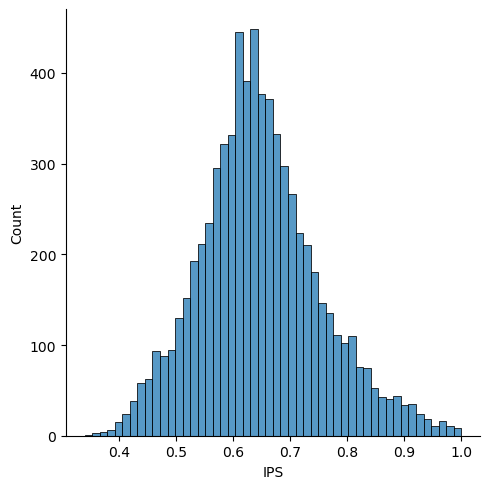

In [17]:
sns.displot(df_2023, x='IPS')

<Axes: >

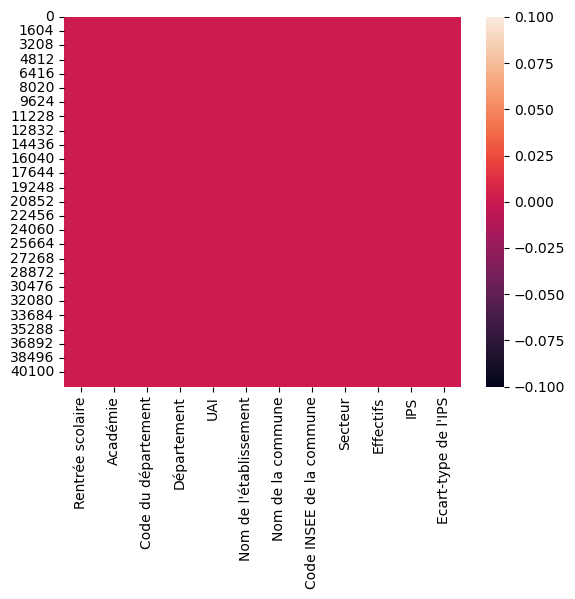

In [18]:
sns.heatmap(df_2016.isnull())

<Axes: >

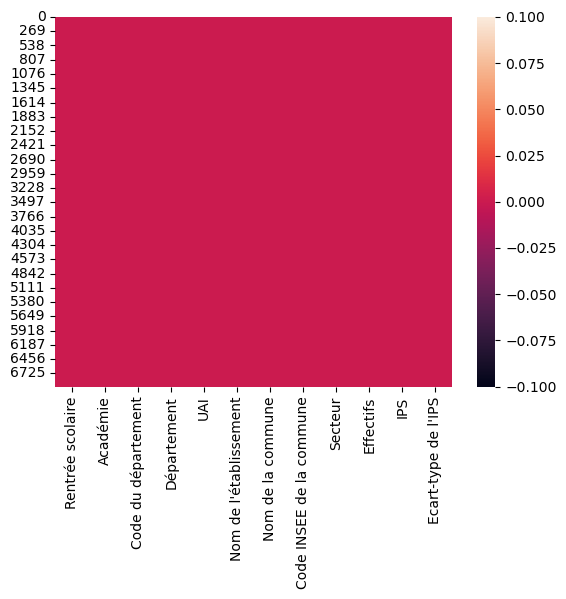

In [19]:
sns.heatmap(df_2022.isnull())

<Axes: >

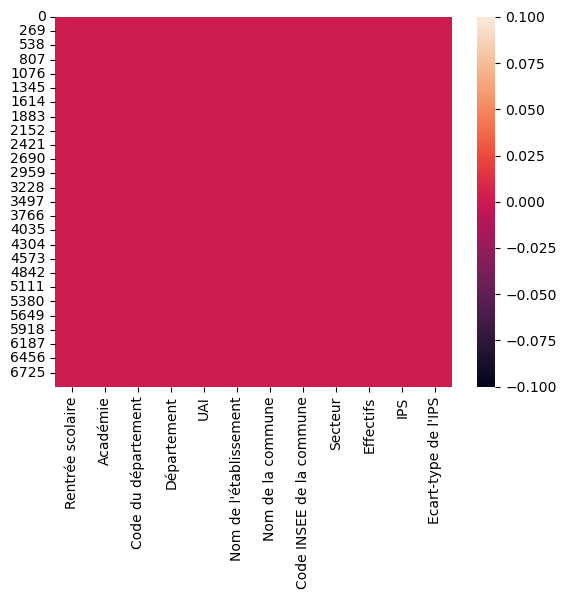

In [20]:
sns.heatmap(df_2023.isnull())

In [21]:
df_1623 = pd.concat([df_2016 ,df_2022, df_2023], axis=0)

<Axes: >

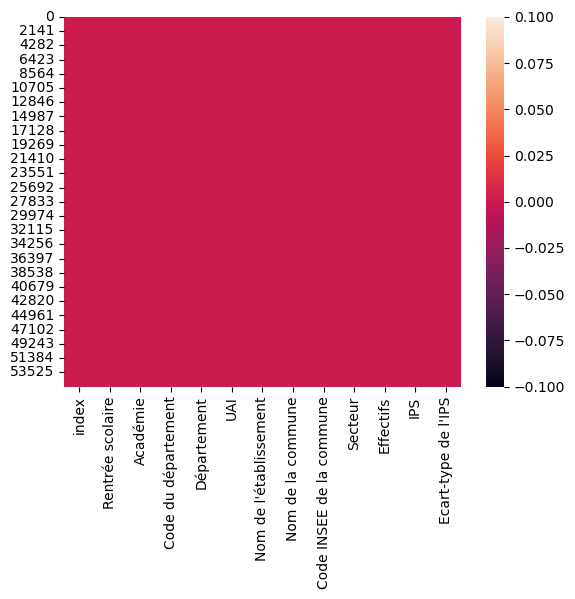

In [22]:
df_1623 = df_1623.reset_index()
sns.heatmap(df_1623.isna())

In [23]:
# split colonne de rentrée scolaire en colonne de rentrée et colonne de diplôme.
# Changement du type en integer au lieu de string.
df_1623[['annee de rentree','annee de diplome']]=df_1623['Rentrée scolaire'].str.split("-", expand=True)
df_1623['annee de rentree'] = df_1623['annee de rentree'].astype('int')
df_1623['annee de diplome'] = df_1623['annee de diplome'].astype('int')

In [24]:
df_1623.columns

Index(['index', 'Rentrée scolaire', 'Académie', 'Code du département',
       'Département', 'UAI', 'Nom de l'établissement', 'Nom de la commune',
       'Code INSEE de la commune', 'Secteur', 'Effectifs', 'IPS',
       'Ecart-type de l'IPS', 'annee de rentree', 'annee de diplome'],
      dtype='object')

In [26]:
#export data
exportfolder = os.environ.get("EXPORTDIR")
df_1623.to_csv(os.path.join(exportfolder,"IPS_colleges_2016_2023.csv"))